In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from context_maps import flat_context_map_builder, hills_context_map_builder, labyrinth_context_map_builder
from walker import Walker, plot_trajectory

# 1. Take a look at the following code
we can imagine a scenario where we want to try a walker that uses a square stepping proposal
rather than a Gaussian one. The code to generate it looks like this:

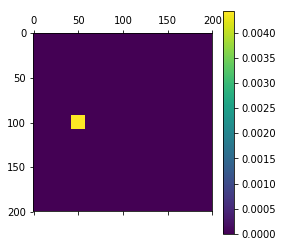

In [2]:
def square_probability(current_i, current_j, width, size):
    grid_ii, grid_jj = np.mgrid[0:size, 0:size]
    inside_mask = (np.abs(grid_ii - current_i) <= width // 2) & (np.abs(grid_jj - current_j) <= width // 2)
    p_next_step = inside_mask / inside_mask.sum()
    return p_next_step

p = square_probability(100, 50, 14, 200)
plt.matshow(p)
plt.colorbar()

# 2. Break out the 'next_step_proposal' function
We would like to be able to decided which "next step proposal" we want to use: the Gaussian one,
 the square one, potentially others!

Modify the code so that you can choose which "next step proposal" to use at construction time.

Consider this: the Gaussian and the square proposals need different parameters to be initialized
. Luckily those parameters don't change over the iterations. For generating the `next_step_proposal`
both just need the current i, j coordinates.


In [4]:
# You will need to modify this part so that you can define which "next step proposal" to use!
walker = Walker.from_context_map_builder(size=200,
                                         context_map_builder=hills_context_map_builder,
                                         sigma_i=3, sigma_j=5)

# 3. Simulate a trajectory with the new proposal method

In [5]:
i, j = 100, 50
trajectory = []
for _ in range(1000):
    i, j = walker.sample_next_step(i, j)
    trajectory.append((i, j))

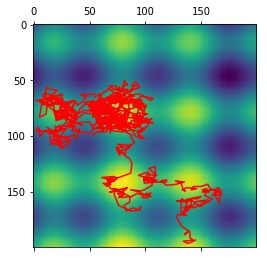

In [6]:
plot_trajectory(trajectory, walker.context_map)